In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

In [4]:
df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', cnn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [5]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [7]:
df.shape

(16044, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [9]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


In [10]:
df.isnull().sum()

rental_date                0
return_date              183
customer_lastname          0
store_id                   0
rental_store_city          0
film_title                 0
film_rental_duration       0
film_rental_rate           0
film_replacement_cost      0
film_rating                0
dtype: int64

In [15]:
df["film_rental_rate"].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

<AxesSubplot: >

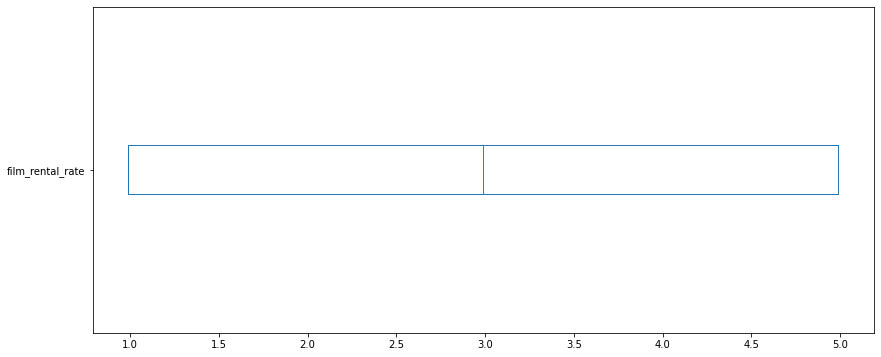

In [17]:
df["film_rental_rate"].plot(kind="box", vert=False, figsize=(14,6))

<AxesSubplot: ylabel='Density'>

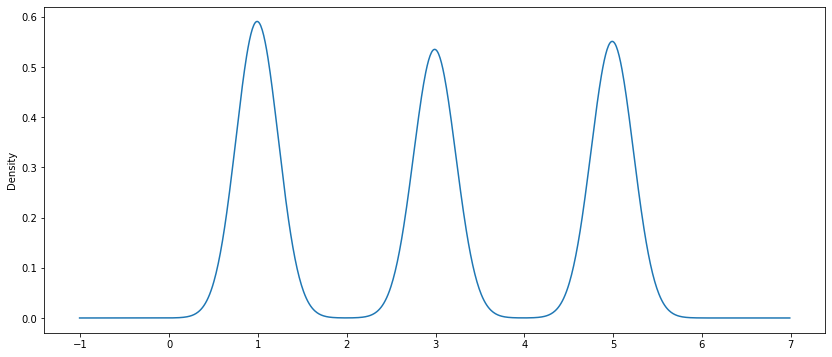

In [18]:
df["film_rental_rate"].plot(kind="density", figsize=(14,6))

Text(0, 0.5, 'Number of rental')

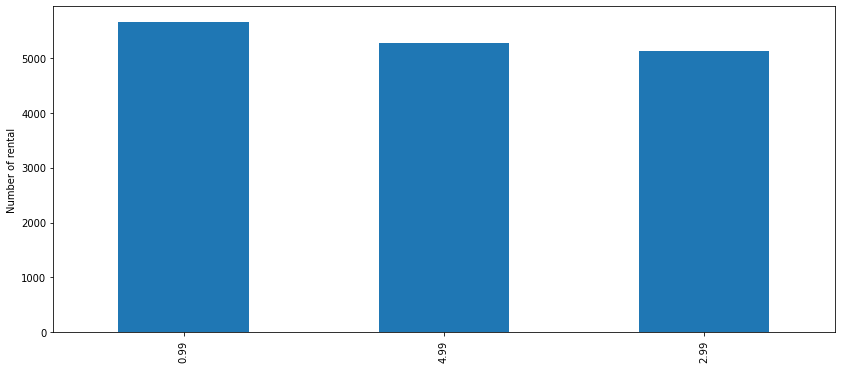

In [21]:
ax = df["film_rental_rate"].value_counts().plot(kind="bar", figsize=(14, 6))
ax.set_ylabel("Number of rental")

In [22]:
df["rental_store_city"].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

<AxesSubplot: ylabel='rental_store_city'>

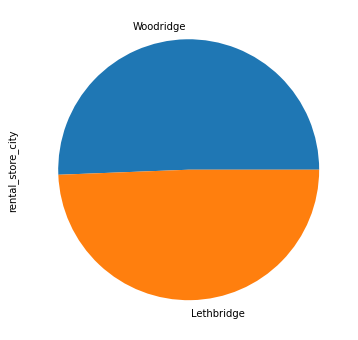

In [24]:
df['rental_store_city'].value_counts().plot(kind="pie", figsize=(14, 6))

Text(0, 0.5, 'Number of rentals')

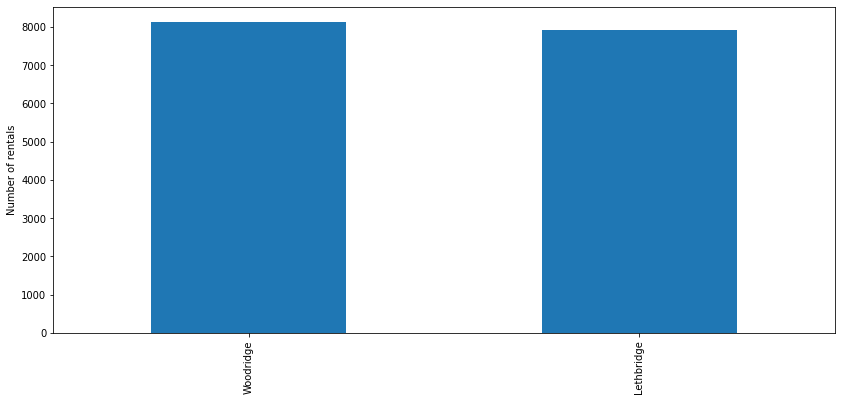

In [25]:
ax = df['rental_store_city'].value_counts().plot(kind="bar", figsize=(14, 6))
ax.set_ylabel("Number of rentals")

In [26]:
df["rental_rate_return"] = (df["film_rental_rate"] / df["film_replacement_cost"]) * 100
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990


<AxesSubplot: ylabel='Density'>

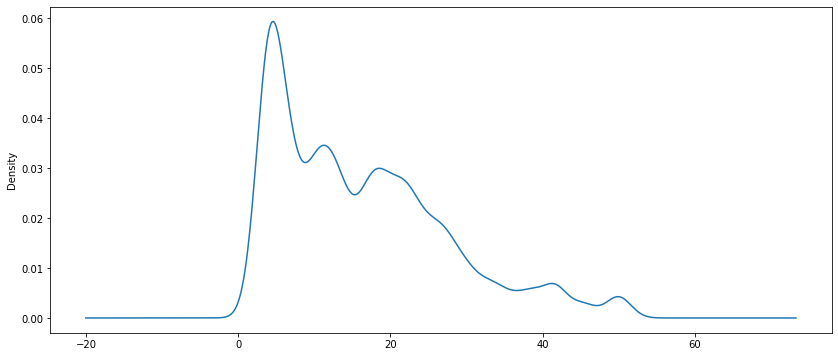

In [27]:
df["rental_rate_return"].plot(kind="density", figsize=(14, 6))

In [30]:
df["rental_rate_return"].mean().round(2)

16.34

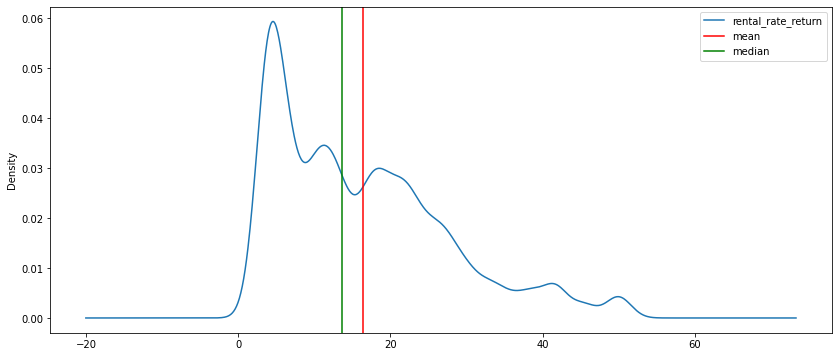

In [32]:
ax = df["rental_rate_return"].plot(kind="density", figsize=(14, 6))
ax.axvline(df["rental_rate_return"].mean().round(2), c="r", label="mean")
ax.axvline(df["rental_rate_return"].median().round(2), c="g", label="median")
plt.legend()

In [33]:
df[df["customer_lastname"]=="HANSEN"]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1368,2005-06-15 14:27:47,2005-06-23 18:07:47,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2603,2005-06-19 06:21:25,2005-06-26 03:19:25,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5209,2005-07-09 11:22:39,2005-07-17 09:31:39,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5266,2005-07-09 14:17:40,2005-07-16 10:42:40,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100


In [36]:
df["film_replacement_cost"].max()

29.99

In [42]:
df.loc[df["film_replacement_cost"]==df["film_replacement_cost"].max(), "film_title"].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

In [43]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990


In [46]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]

6797

In [48]:
df["film_rental_duration"].mean()

4.935489902767389

In [49]:
df["film_rental_duration"].value_counts()

3    3412
6    3392
4    3251
5    3165
7    2824
Name: film_rental_duration, dtype: int64

<AxesSubplot: >

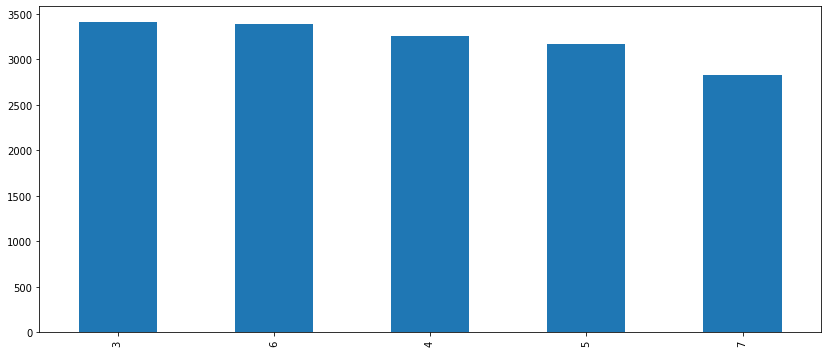

In [50]:
df["film_rental_duration"].value_counts().plot(kind="bar", figsize=(14, 6))

In [51]:
df["film_rental_rate"].value_counts()

0.99    5652
4.99    5272
2.99    5120
Name: film_rental_rate, dtype: int64

<AxesSubplot: ylabel='film_rental_rate'>

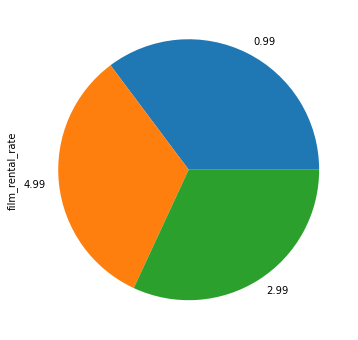

In [52]:
df["film_rental_rate"].value_counts().plot(kind="pie", figsize=(14, 6))

<AxesSubplot: >

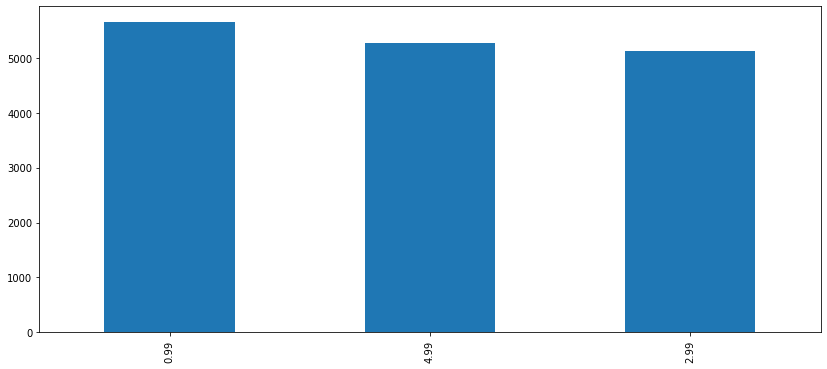

In [53]:
df["film_rental_rate"].value_counts().plot(kind="bar", figsize=(14, 6))

In [54]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990


In [55]:
df["film_replacement_cost"].value_counts()

22.99    1044
27.99     958
21.99     912
29.99     868
12.99     864
20.99     863
14.99     821
13.99     803
11.99     749
25.99     740
26.99     737
10.99     720
28.99     716
18.99     696
17.99     691
23.99     690
9.99      684
19.99     657
16.99     639
24.99     633
15.99     559
Name: film_replacement_cost, dtype: int64

<AxesSubplot: >

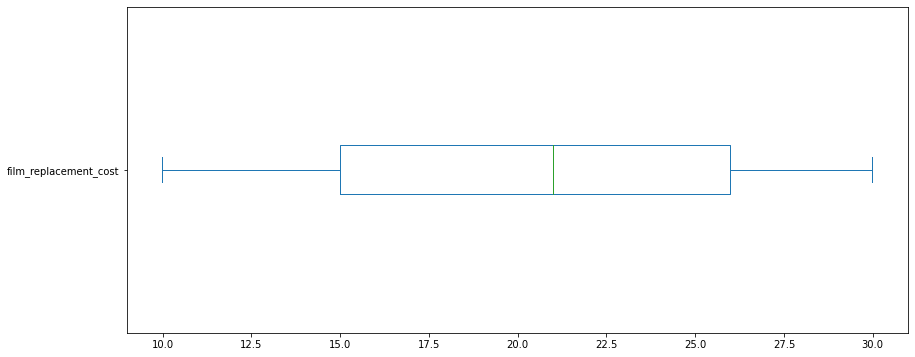

In [61]:
df["film_replacement_cost"].plot(kind="box",vert=False, figsize=(14, 6))

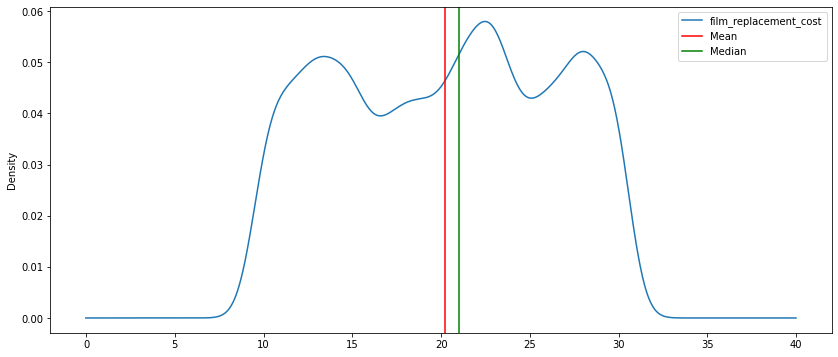

In [62]:
ax = df["film_replacement_cost"].plot(kind="density", figsize=(14, 6))
ax.axvline(df["film_replacement_cost"].mean(), c="r", label="Mean")
ax.axvline(df["film_replacement_cost"].median(), c="g", label="Median")
plt.legend()

In [63]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990


In [65]:
df["film_rating"].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<AxesSubplot: >

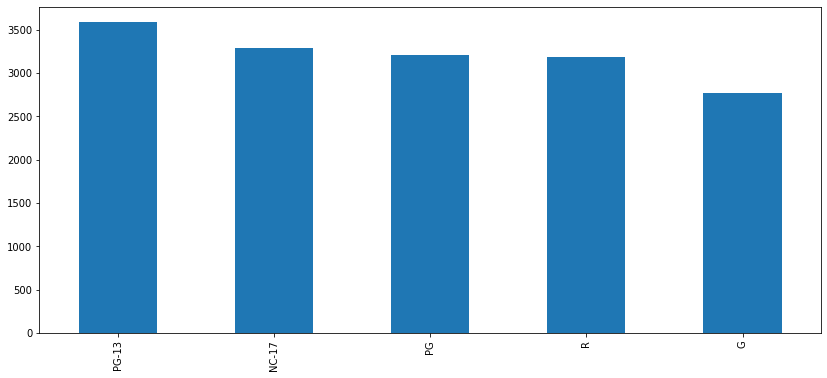

In [66]:
df["film_rating"].value_counts().plot(kind="bar", figsize=(14,6))

<AxesSubplot: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

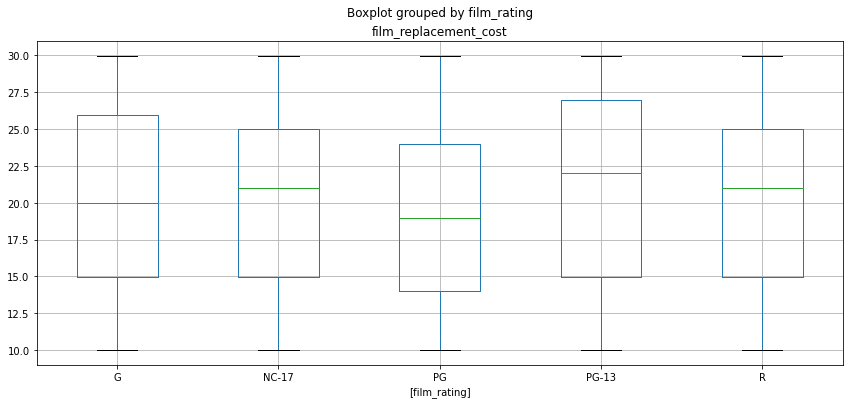

In [67]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

In [68]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990


In [70]:
df["rental_days"] = df[["rental_date", "return_date"]].apply(lambda x: (x[1]-x[0]).days, axis=1)
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return,rental_days
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090,1.0
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587,3.0
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631,7.0
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046,9.0
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990,8.0


In [71]:
df["rental_days"].mean()

4.525944139713763

<AxesSubplot: ylabel='Density'>

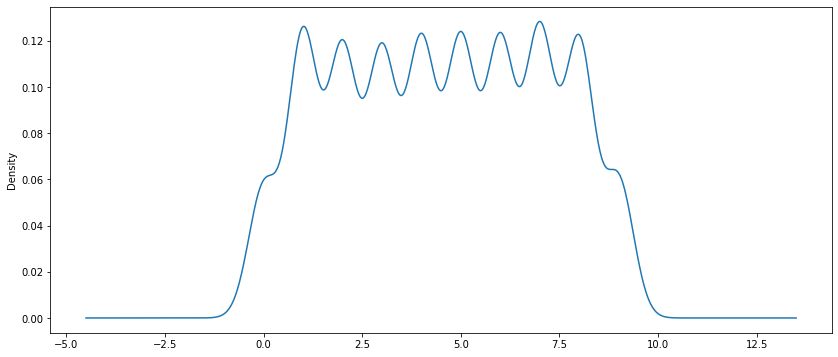

In [72]:
df["rental_days"].plot(kind="density", figsize=(14, 6))

In [74]:
df["film_daily_rental_rate"] = df["film_rental_rate"]/df["film_rental_duration"]
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090,1.0,0.427143
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631,7.0,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046,9.0,0.165000
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990,8.0,0.598000


In [76]:
df["film_daily_rental_rate"].mean()

0.6458262471655329

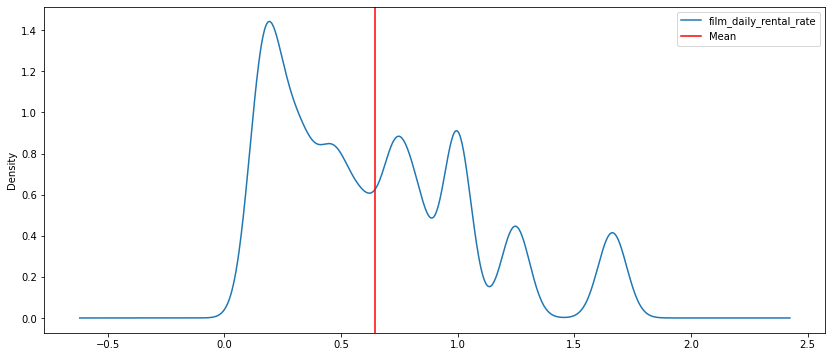

In [78]:
ax = df["film_daily_rental_rate"].plot(kind="density", figsize=(14, 6))
ax.axvline(df["film_daily_rental_rate"].mean(), c="r", label="Mean")
plt.legend()

In [93]:
df["film_daily_rental_rate"].nsmallest()

rental_id
18    0.141429
37    0.141429
48    0.141429
74    0.141429
76    0.141429
Name: film_daily_rental_rate, dtype: float64

In [106]:
df.loc[(df["film_daily_rental_rate"]==df["film_daily_rental_rate"].min()), ["film_title","film_daily_rental_rate"]].head(10)

,film_title,film_daily_rental_rate
rental_id,,
18,ROMAN PUNK,0.141429
37,BORROWERS BEDAZZLED,0.141429
48,GUN BONNIE,0.141429
74,GREEDY ROOTS,0.141429
76,PATIENT SISTER,0.141429
87,GANDHI KWAI,0.141429
117,VALENTINE VANISHING,0.141429
133,BORROWERS BEDAZZLED,0.141429
148,UNFORGIVEN ZOOLANDER,0.141429


In [107]:
df.loc[(df["film_daily_rental_rate"]==df["film_daily_rental_rate"].max()), ["film_title","film_daily_rental_rate"]].head(10)

,film_title,film_daily_rental_rate
rental_id,,
13,KING EVOLUTION,1.663333
40,MINDS TRUMAN,1.663333
68,TEEN APOLLO,1.663333
106,SHOW LORD,1.663333
116,WIFE TURN,1.663333
124,BACKLASH UNDEFEATED,1.663333
135,AMERICAN CIRCUS,1.663333
152,MIDSUMMER GROUNDHOG,1.663333
155,BEHAVIOR RUNAWAY,1.663333


In [108]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090,1.0,0.427143
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631,7.0,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046,9.0,0.165000
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990,8.0,0.598000


In [109]:
df[df["rental_store_city"]=="Lethbridge"].shape[0]

7923

In [111]:
leth = df[df["rental_store_city"]=="Lethbridge"]

In [112]:
leth["film_rating"].value_counts()

PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: film_rating, dtype: int64

<AxesSubplot: >

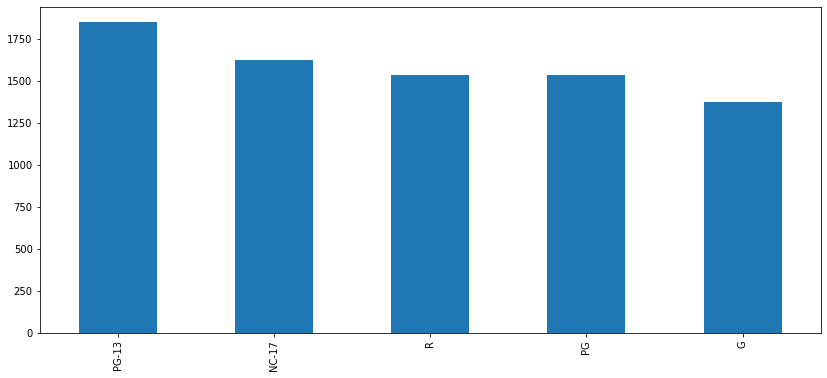

In [113]:
leth["film_rating"].value_counts().plot(kind="bar", figsize=(14,6))

In [115]:
df.loc[(df["rental_store_city"]=="Woodridge") & (df["film_rental_duration"] > 5)].shape[0]

3186

In [117]:
df.loc[(df["store_id"]==2)|(df["film_replacement_cost"]<10.99)].shape[0]

8444

In [114]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_rate_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090,1.0,0.427143
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631,7.0,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046,9.0,0.165000
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990,8.0,0.598000


## Nasvile House Data

In [3]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 897.3 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_excel("nasvilehouse.xlsx")

In [44]:
df = df.drop("TaxDistrict", axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UniqueID         56477 non-null  int64         
 1   ParcelID         56477 non-null  object        
 2   LandUse          56477 non-null  object        
 3   PropertyAddress  56448 non-null  object        
 4   SaleDate         56477 non-null  datetime64[ns]
 5   SalePrice        56477 non-null  int64         
 6   LegalReference   56477 non-null  object        
 7   SoldAsVacant     56477 non-null  object        
 8   OwnerName        25261 non-null  object        
 9   OwnerAddress     26015 non-null  object        
 10  Acreage          26015 non-null  float64       
 11  LandValue        26015 non-null  float64       
 12  BuildingValue    26015 non-null  float64       
 13  TotalValue       26015 non-null  float64       
 14  YearBuilt        24163 non-null  float

In [16]:
df.nlargest(10, "SalePrice")

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
21574,25631,093 13 0B 108.00,RESIDENTIAL CONDO,"320 11TH AVE S, NASHVILLE",2014-12-17,54278060,20141217-0115478,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21579,25632,093 13 0B 134.00,RESIDENTIAL CONDO,"320 11TH AVE S, NASHVILLE",2014-12-17,54278060,20141217-0115478,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21591,25633,093 13 0B 322.00,RESIDENTIAL CONDO,"320 11TH AVE S, NASHVILLE",2014-12-17,54278060,20141217-0115478,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21594,25634,093 13 0B 337.00,RESIDENTIAL CONDO,"320 11TH AVE S, NASHVILLE",2014-12-17,54278060,20141217-0115478,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21601,25635,093 13 0B 447.00,RESIDENTIAL CONDO,"320 11TH AVE S, NASHVILLE",2014-12-17,54278060,20141217-0115478,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21603,25636,093 13 0B 448.00,RESIDENTIAL CONDO,"320 11TH AVE S, NASHVILLE",2014-12-17,54278060,20141217-0115478,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21605,25637,093 13 0B 456.00,RESIDENTIAL CONDO,"320 11TH AVE S, NASHVILLE",2014-12-17,54278060,20141217-0115478,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14272,35016,082 12 0C 001.00,RESIDENTIAL CONDO,"52 MCFERRIN AVE, NASHVILLE",2015-07-14,14100000,20150716-0069771,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14273,35017,082 12 0C 002.00,RESIDENTIAL CONDO,"50 MCFERRIN AVE, NASHVILLE",2015-07-14,14100000,20150716-0069771,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14274,35018,082 12 0C 003.00,RESIDENTIAL CONDO,"48 MCFERRIN AVE, NASHVILLE",2015-07-14,14100000,20150716-0069771,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.isnull().sum()

UniqueID               0
ParcelID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
LegalReference         0
SoldAsVacant           0
OwnerName          31216
OwnerAddress       30462
Acreage            30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

In [19]:
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


In [46]:
df.fillna({"PropertyAddress":"Unknow"}, inplace=True)

In [48]:
df.fillna({"OwnerName":"Unknow",
          "OwnerAddress":"Unknow",
          "Acreage":0,
          "LandValue":0,
          "BuildingValue":0,
          "TotalValue":0,
          "YearBuilt":0,
          "Bedrooms":0,
          "FullBath":0,
          "HalfBath":0}, inplace=True)

In [49]:
df.isnull().sum()

UniqueID           0
ParcelID           0
LandUse            0
PropertyAddress    0
SaleDate           0
SalePrice          0
LegalReference     0
SoldAsVacant       0
OwnerName          0
OwnerAddress       0
Acreage            0
LandValue          0
BuildingValue      0
TotalValue         0
YearBuilt          0
Bedrooms           0
FullBath           0
HalfBath           0
dtype: int64

In [53]:
df["Address"] = df["PropertyAddress"].apply(lambda x: f"{x.split(',')[0]}")

In [59]:
df["City"] = df["PropertyAddress"].apply(lambda x: f"{x.split(',')[-1]}")

In [61]:
df["State"] = df["OwnerAddress"].apply(lambda x: f"{x.split(',')[-1]}")

In [64]:
df = df.drop(["PropertyAddress", "OwnerAddress"], axis=1)

In [65]:
df.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,Address,City,State
0,2045,007 00 0 125.00,SINGLE FAMILY,2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE",2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE",3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.",2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,TN


In [66]:
df["Address"].value_counts()

1212  LAUREL ST            296
600  12TH AVE S            208
301  DEMONBREUN ST         146
270  TAMPA DR              138
1350  ROSA L PARKS BLVD    129
                          ... 
6219 ROBERTSON  AVE          1
6205  ROBERTSON AVE          1
6101  ROBERTSON AVE          1
569  STEVENSON ST            1
1713 PARK TERRACE  LN        1
Name: Address, Length: 45062, dtype: int64

In [68]:
df["SoldAsVacant"].value_counts()

No     51403
Yes     4623
N        399
Y         52
Name: SoldAsVacant, dtype: int64

In [73]:
df["Sold_AS_Vacant"] = df["SoldAsVacant"].map({"Y":"Yes",
                                               "N":"No",
                                             "Yes":"Yes",
                                             "No":"No"})

In [78]:
df = df.drop(["SoldAsVacant", "SoldAS_Vacant"], axis=1)

In [83]:
df["Sold_AS_Vacant"].value_counts()

No     51802
Yes     4675
Name: Sold_AS_Vacant, dtype: int64

In [82]:
df[df["Sold_AS_Vacant"]=="No"]

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,OwnerName,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,Address,City,State,Sold_AS_Vacant
0,2045,007 00 0 125.00,SINGLE FAMILY,2013-04-09,240000,20130412-0036474,"FRAZIER, CYRENTHA LYNETTE",2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,TN,No
1,16918,007 00 0 130.00,SINGLE FAMILY,2014-06-10,366000,20140619-0053768,"BONER, CHARLES & LESLIE",3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,TN,No
2,54582,007 00 0 138.00,SINGLE FAMILY,2016-09-26,435000,20160927-0101718,"WILSON, JAMES E. & JOANNE",2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,TN,No
3,43070,007 00 0 143.00,SINGLE FAMILY,2016-01-29,255000,20160129-0008913,"BAKER, JAY K. & SUSAN E.",2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,TN,No
4,22714,007 00 0 149.00,SINGLE FAMILY,2014-10-10,278000,20141015-0095255,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,TN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56458,27706,188 10 0A 055.00,SINGLE FAMILY,2015-03-23,199900,20150325-0025522,Unknow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2027 OAK TRAIL DR,NOLENSVILLE,Unknow,No
56465,51591,188 10 0A 086.00,SINGLE FAMILY,2016-07-22,170000,20160726-0076974,Unknow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202 BIRDNEST ALY,NOLENSVILLE,Unknow,No
56471,9492,188 10 0A 100.00,SINGLE FAMILY,2013-11-08,168000,20131112-0116554,Unknow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1437 WINDING CREEK DR,NOLENSVILLE,Unknow,No
56472,30469,188 10 0A 101.00,SINGLE FAMILY,2015-05-27,157500,20150608-0053286,Unknow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1435 WINDING CREEK DR,NOLENSVILLE,Unknow,No


In [79]:
df.head()

,UniqueID,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,OwnerName,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,Address,City,State,Sold_AS_Vacant
0,2045,007 00 0 125.00,SINGLE FAMILY,2013-04-09,240000,20130412-0036474,"FRAZIER, CYRENTHA LYNETTE",2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,TN,No
1,16918,007 00 0 130.00,SINGLE FAMILY,2014-06-10,366000,20140619-0053768,"BONER, CHARLES & LESLIE",3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,TN,No
2,54582,007 00 0 138.00,SINGLE FAMILY,2016-09-26,435000,20160927-0101718,"WILSON, JAMES E. & JOANNE",2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,TN,No
3,43070,007 00 0 143.00,SINGLE FAMILY,2016-01-29,255000,20160129-0008913,"BAKER, JAY K. & SUSAN E.",2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,TN,No
4,22714,007 00 0 149.00,SINGLE FAMILY,2014-10-10,278000,20141015-0095255,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,TN,No
